In [1]:
# 1. Setup and Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# 2. Load and Explore the Dataset
df = pd.read_csv('/diabetes[1].csv')

In [48]:
# Perform an exploratory data analysis (EDA)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [49]:
# Convert categorical variables to numerical
df = pd.get_dummies(df)

In [50]:
# Check for any remaining non-numeric columns
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [51]:
# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

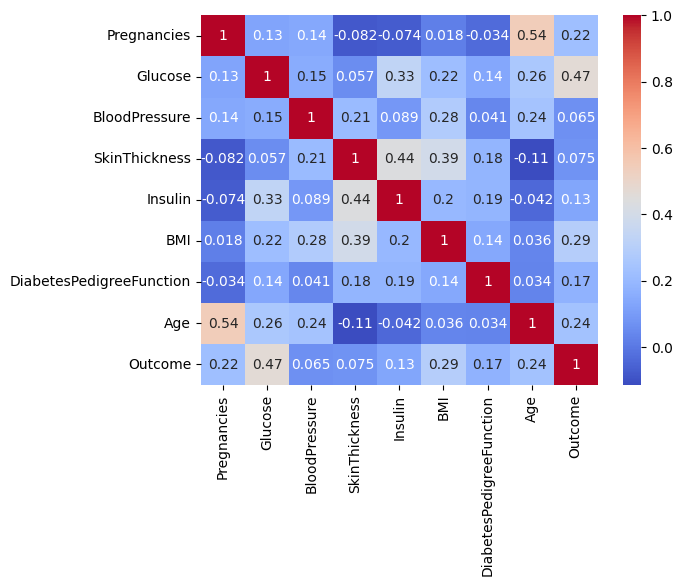

In [52]:
# Plot heatmap
sns.heatmap(df_imputed.corr(), annot=True, cmap="coolwarm")
plt.show()

In [54]:
# 3. Data Preprocessing
X = df_imputed.drop("Outcome", axis=1)  # Features (independent variables)
y = df_imputed["Outcome"]  # Target variable (dependent variable)



In [55]:
# Optionally, scale features if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [57]:

# 5. Model Selection and Training
model = LinearRegression()  # You could also try RandomForestRegressor(), etc.
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# 6. Prediction and Evaluation
y_pred = model.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.17104527280850101
R² Score: 0.25500281176741757


In [60]:
# 7. Cross-Validation
scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", scores)
print("Mean Cross-Validation R² Score:", np.mean(scores))

Cross-Validation R² Scores: [0.25683342 0.2575739  0.29068798 0.28108337 0.29414534]
Mean Cross-Validation R² Score: 0.276064800525974


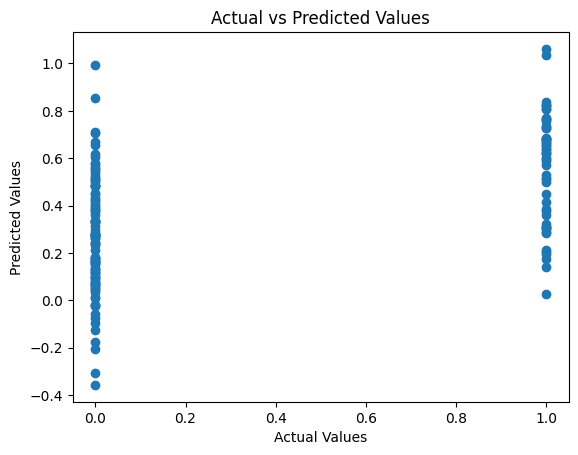

In [62]:
# 8. Visualization of Results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()
